In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import model_summary,S8_Model_BN
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('S8/util.py')
from util import test, train, plot_acc_loss
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cuda


In [2]:
train_loader ,  test_loader  = load_data()


Files already downloaded and verified
Files already downloaded and verified


In [3]:
model = S8_Model_BN().to(device)
model_summary(model,input_size= (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
           Dropout-4           [-1, 20, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           3,600
       BatchNorm2d-6           [-1, 20, 32, 32]              40
              ReLU-7           [-1, 20, 32, 32]               0
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 20, 32, 32]             420
        MaxPool2d-10           [-1, 20, 16, 16]               0
           Conv2d-11           [-1, 12, 16, 16]           2,160
      BatchNorm2d-12           [-1, 12, 16, 16]              24
             ReLU-13           [-1, 12, 16, 16]               0
          Dropout-14           [-1, 12,

In [4]:
STEPS_PER_EPOCH =int(len(train_loader)*1)
print(f'STEPS_PER_EPOCH {STEPS_PER_EPOCH}')
criterion = F.nll_loss
num_epochs = 20
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.99,weight_decay=0.0001,nesterov=False)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer_sgd,max_lr=0.1,epochs=num_epochs,steps_per_epoch=10)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_sgd,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




STEPS_PER_EPOCH 98
Epoch 1


Train: Loss=1.9135 Batch_id=97 Accuracy=20.83: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]


Test set: Average loss: 0.0041, Accuracy: 1894/10000 (18.94%)

Epoch 2


Train: Loss=1.6200 Batch_id=97 Accuracy=33.52: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Test set: Average loss: 0.0041, Accuracy: 2476/10000 (24.76%)

Epoch 3


Train: Loss=1.5324 Batch_id=97 Accuracy=39.75: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0041, Accuracy: 2816/10000 (28.16%)

Epoch 4


Train: Loss=1.3494 Batch_id=97 Accuracy=43.74: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0035, Accuracy: 3725/10000 (37.25%)

Epoch 5


Train: Loss=1.4909 Batch_id=97 Accuracy=48.70: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0032, Accuracy: 4284/10000 (42.84%)

Epoch 6


Train: Loss=1.3693 Batch_id=97 Accuracy=52.31: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0026, Accuracy: 5241/10000 (52.41%)

Epoch 7


Train: Loss=1.2059 Batch_id=97 Accuracy=55.30: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Test set: Average loss: 0.0030, Accuracy: 4560/10000 (45.60%)

Epoch 8


Train: Loss=1.0818 Batch_id=97 Accuracy=57.52: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0024, Accuracy: 5625/10000 (56.25%)

Epoch 9


Train: Loss=1.1064 Batch_id=97 Accuracy=59.09: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.0033, Accuracy: 4500/10000 (45.00%)

Epoch 10


Train: Loss=1.0238 Batch_id=97 Accuracy=60.04: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0031, Accuracy: 4900/10000 (49.00%)

Epoch 11


Train: Loss=1.1647 Batch_id=97 Accuracy=61.27: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0022, Accuracy: 6062/10000 (60.62%)

Epoch 12


Train: Loss=0.9670 Batch_id=97 Accuracy=62.08: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0022, Accuracy: 6049/10000 (60.49%)

Epoch 13


Train: Loss=0.8955 Batch_id=97 Accuracy=63.65: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


Test set: Average loss: 0.0021, Accuracy: 6316/10000 (63.16%)

Epoch 14


Train: Loss=1.0614 Batch_id=97 Accuracy=64.04: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]


Test set: Average loss: 0.0023, Accuracy: 5866/10000 (58.66%)

Epoch 15


Train: Loss=0.9922 Batch_id=97 Accuracy=64.43: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


Test set: Average loss: 0.0021, Accuracy: 6329/10000 (63.29%)

Epoch 16


Train: Loss=0.9866 Batch_id=97 Accuracy=65.28: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.0020, Accuracy: 6484/10000 (64.84%)

Epoch 17


Train: Loss=1.0630 Batch_id=97 Accuracy=66.03: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


Test set: Average loss: 0.0021, Accuracy: 6282/10000 (62.82%)

Epoch 18


Train: Loss=0.9120 Batch_id=97 Accuracy=66.31: 100%|██████████| 98/98 [00:20<00:00,  4.68it/s]


Test set: Average loss: 0.0024, Accuracy: 5706/10000 (57.06%)

Epoch 19


Train: Loss=0.9746 Batch_id=97 Accuracy=66.79: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0020, Accuracy: 6368/10000 (63.68%)

Epoch 20


Train: Loss=0.8335 Batch_id=97 Accuracy=67.21: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0020, Accuracy: 6407/10000 (64.07%)



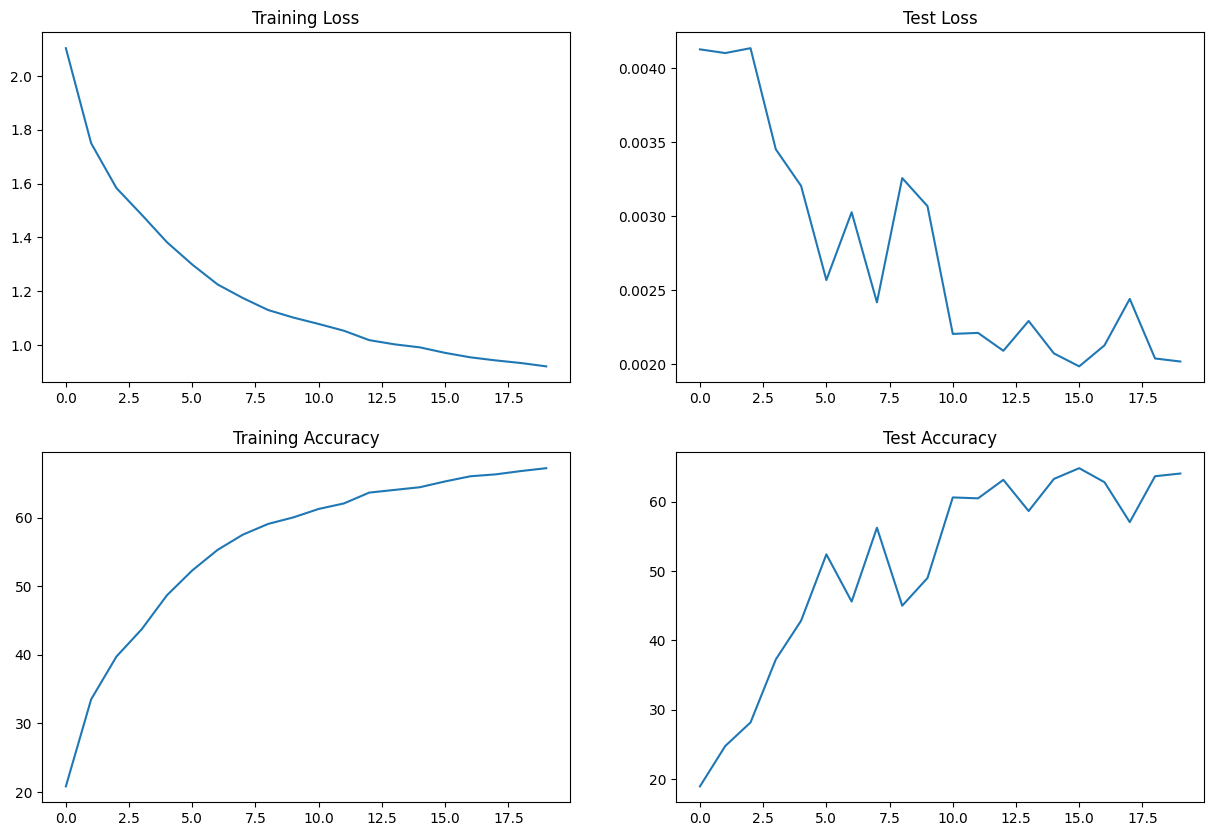

In [5]:
plot_acc_loss()

In [6]:
optimizer_adam = optim.Adam(model.parameters(), lr=0.02,weight_decay=0.001)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer_adam,max_lr=0.1,epochs=num_epochs,steps_per_epoch=STEPS_PER_EPOCH)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_adam,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=0.9328 Batch_id=97 Accuracy=65.35: 100%|██████████| 98/98 [00:21<00:00,  4.67it/s]


Test set: Average loss: 0.0022, Accuracy: 6125/10000 (61.25%)

Epoch 2


Train: Loss=0.9479 Batch_id=97 Accuracy=67.52: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0020, Accuracy: 6455/10000 (64.55%)

Epoch 3


Train: Loss=0.9725 Batch_id=97 Accuracy=68.15: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0021, Accuracy: 6265/10000 (62.65%)

Epoch 4


Train: Loss=0.9747 Batch_id=97 Accuracy=68.02: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Test set: Average loss: 0.0026, Accuracy: 5484/10000 (54.84%)

Epoch 5


Train: Loss=0.8420 Batch_id=97 Accuracy=68.47: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0022, Accuracy: 6062/10000 (60.62%)

Epoch 6


Train: Loss=0.9266 Batch_id=97 Accuracy=69.06: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0025, Accuracy: 5876/10000 (58.76%)

Epoch 7


Train: Loss=0.9804 Batch_id=97 Accuracy=69.09: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.0021, Accuracy: 6397/10000 (63.97%)

Epoch 8


Train: Loss=0.8697 Batch_id=97 Accuracy=69.65: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


Test set: Average loss: 0.0023, Accuracy: 6144/10000 (61.44%)

Epoch 9


Train: Loss=0.8602 Batch_id=97 Accuracy=70.22: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]


Test set: Average loss: 0.0020, Accuracy: 6569/10000 (65.69%)

Epoch 10


Train: Loss=0.8495 Batch_id=97 Accuracy=70.12: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0024, Accuracy: 5764/10000 (57.64%)

Epoch 11


Train: Loss=0.8721 Batch_id=97 Accuracy=69.93: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]


Test set: Average loss: 0.0020, Accuracy: 6466/10000 (64.66%)

Epoch 12


Train: Loss=0.8585 Batch_id=97 Accuracy=70.43: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s]


Test set: Average loss: 0.0019, Accuracy: 6674/10000 (66.74%)

Epoch 13


Train: Loss=0.8192 Batch_id=97 Accuracy=70.70: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.0025, Accuracy: 5814/10000 (58.14%)

Epoch 14


Train: Loss=0.8573 Batch_id=97 Accuracy=70.74: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]


Test set: Average loss: 0.0021, Accuracy: 6489/10000 (64.89%)

Epoch 15


Train: Loss=0.8057 Batch_id=97 Accuracy=70.99: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.0021, Accuracy: 6414/10000 (64.14%)

Epoch 16


Train: Loss=0.7770 Batch_id=97 Accuracy=71.21: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0019, Accuracy: 6632/10000 (66.32%)

Epoch 17


Train: Loss=0.8339 Batch_id=97 Accuracy=71.55: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s]


Test set: Average loss: 0.0016, Accuracy: 7185/10000 (71.85%)

Epoch 18


Train: Loss=0.8543 Batch_id=97 Accuracy=71.47: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


Test set: Average loss: 0.0019, Accuracy: 6600/10000 (66.00%)

Epoch 19


Train: Loss=0.8547 Batch_id=97 Accuracy=71.32: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]


Test set: Average loss: 0.0017, Accuracy: 7057/10000 (70.57%)

Epoch 20


Train: Loss=0.7658 Batch_id=97 Accuracy=71.87: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


Test set: Average loss: 0.0019, Accuracy: 6808/10000 (68.08%)



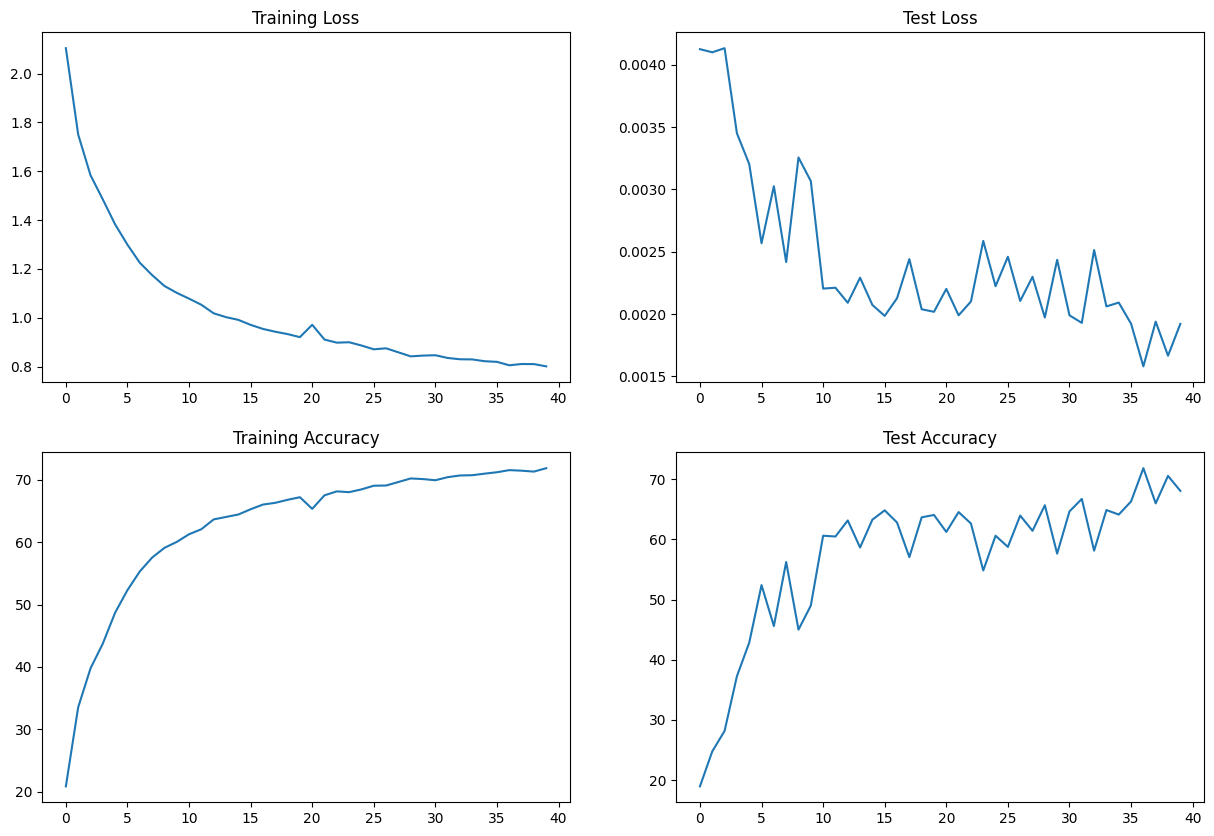

In [7]:
plot_acc_loss()

In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

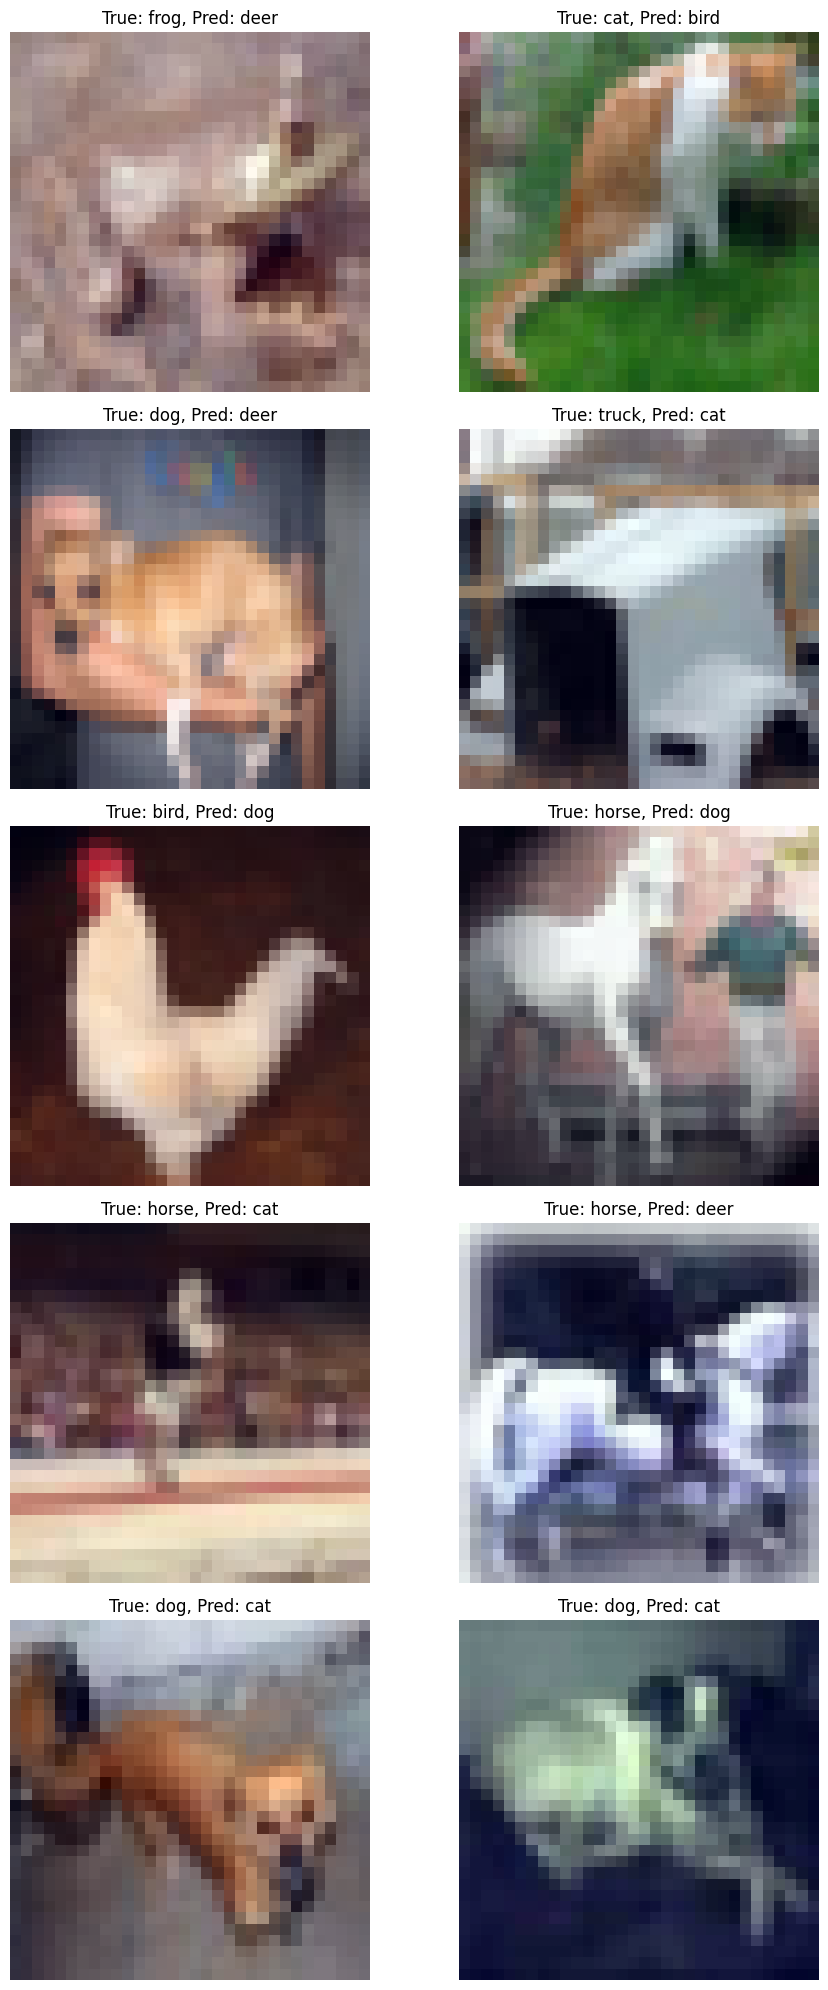

In [10]:
def find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes, num_images=10):
    model.eval()  # Set the model to evaluation mode
    misclassified_images = []
    misclassified_true = []
    misclassified_pred = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, preds = torch.max(output, 1)
            misclassified_idxs = (preds != target).nonzero(as_tuple=False).squeeze()

            for idx in misclassified_idxs:
                if len(misclassified_images) < num_images:
                    misclassified_images.append(data[idx].cpu())
                    misclassified_true.append(target[idx].cpu())
                    misclassified_pred.append(preds[idx].cpu())
                else:
                    plot_misclassified_images(misclassified_images, misclassified_true, misclassified_pred, classes)
                    return
    if misclassified_images:
        plot_misclassified_images(misclassified_images, misclassified_true, misclassified_pred, classes)
import matplotlib.pyplot as plt

def plot_misclassified_images(images, true_labels, predicted_labels, classes):
    fig, axes = plt.subplots((len(images) + 1) // 2, 2, figsize=(10, 20))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img = images[i].numpy().transpose((1, 2, 0))
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
            ax.imshow(img)
            ax.set_title(f"True: {classes[true_labels[i].item()]}, Pred: {classes[predicted_labels[i].item()]}")
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()


# Assume 'model', 'device', 'test_loader', 'criterion', and 'classes' are already defined
find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes)
